In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import math

In [3]:
dat = pd.read_csv('datasets_loyaltydata.csv')

In [4]:
dat.head()

,Unnamed: 0,loyalty1,loyalty2,loyalty3
0,1,9,10,4
1,2,10,11,5
2,3,10,10,5
3,4,9,10,5
4,5,8,11,4


In [5]:
dat.describe()

,Unnamed: 0,loyalty1,loyalty2,loyalty3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,9.960000,10.449000,5.072000
std,288.819436,1.043786,1.332357,1.045901
min,1.000000,7.000000,7.000000,2.000000
25%,250.750000,9.000000,10.000000,4.000000
50%,500.500000,10.000000,10.000000,5.000000
75%,750.250000,11.000000,11.000000,6.000000
max,1000.000000,13.000000,16.000000,8.000000


In [7]:
dat[['loyalty1', 'loyalty2', 'loyalty3']].corr()

,loyalty1,loyalty2,loyalty3
loyalty1,1.000000,0.395853,0.498695
loyalty2,0.395853,1.000000,0.573709
loyalty3,0.498695,0.573709,1.000000


In [8]:
corr_mat = dat[['loyalty1', 'loyalty2', 'loyalty3']].corr().round(2)
corr_mat

,loyalty1,loyalty2,loyalty3
loyalty1,1.0,0.40,0.50
loyalty2,0.4,1.00,0.57
loyalty3,0.5,0.57,1.00


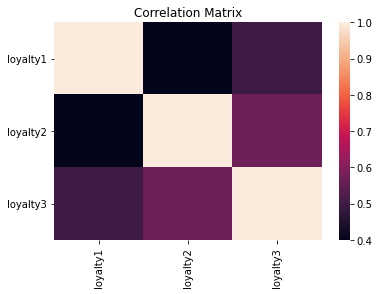

In [10]:
sns.heatmap(corr_mat, vmax=1.0)
plt.title('Correlation Matrix')
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

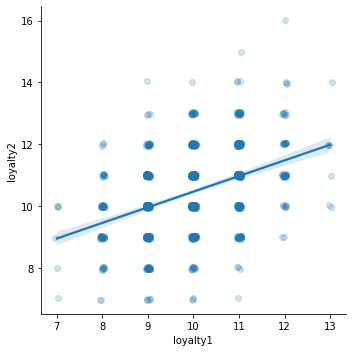

In [19]:
sns.lmplot('loyalty1', 'loyalty2', dat, x_jitter=.05, y_jitter=.05, scatter_kws={'alpha':0.2}, fit_reg=True)

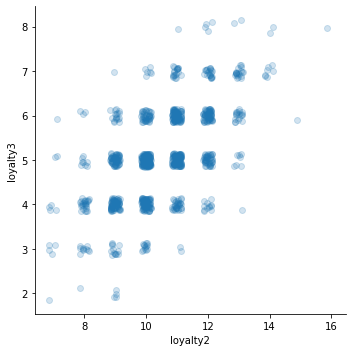

In [21]:
sns.lmplot('loyalty2', 'loyalty3', dat, x_jitter=.15, y_jitter=.15, scatter_kws={'alpha':.2}, fit_reg=False)

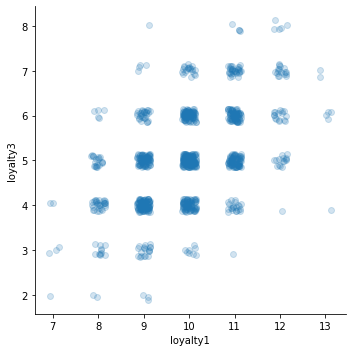

In [22]:
sns.lmplot('loyalty1', 'loyalty3', dat, x_jitter=.15, y_jitter=.15, scatter_kws={'alpha':.2}, fit_reg=False)

In [23]:
# have no real clue what this is so I will include the instructions
'''We can easily compute the confidence intervals of these correlation coefficients. 
However, this requires a few steps (don't worry if you don't follow this completely:

Transform the correlation from the initial space which we call r to a transformed space z. 
1 The distribution of errors is Normal in this transformed space.
2 Compute the CI in the transformed space.
3 Transform back to the original space.'''

"We can easily compute the confidence intervals of these correlation coefficients. However, this requires a few steps (don't worry if you don't follow this completely:\n\nTransform the correlation from the initial space which we call r to a transformed space z. The distribution of errors is Normal in this transformed space.\nCompute the CI in the transformed space.\nTransform back to the original space."

In [24]:
def r_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_conf_int(r, alpha, n):
    # Transform r to z space
    z = r_z(r)
    # Compute standard error and critcal value in z
    se = 1.0 / math.sqrt(n - 3)
    z_crit = ss.norm.ppf(1 - alpha/2)

    ## Compute CIs with transform to r
    lo = z_r(z - z_crit * se)
    hi = z_r(z + z_crit * se)
    return (lo, hi)

print('\nFor loyalty1 vs. loyalty2')
corr_mat = np.array(corr_mat)
conf_ints = r_conf_int(corr_mat[1,0], 0.05, 1000)
print('Correlation = %4.3f with CI of %4.3f to %4.3f' % 
      (corr_mat[1,0], conf_ints[0], conf_ints[1]))

print('\nFor loyalty1 vs. loyalty3')
conf_ints = r_conf_int(corr_mat[2,0], 0.05, 1000)

print('Correlation = %4.3f with CI of %4.3f to %4.3f' % 
      (corr_mat[2,0], conf_ints[0], conf_ints[1]))

print('\nFor loyalty2 vs. loyalty3')
conf_ints = r_conf_int(corr_mat[2,1], 0.05, 1000)
print('Correlation = %4.3f with CI of %4.3f to %4.3f' % 
      (corr_mat[2,1], conf_ints[0], conf_ints[1]))


For loyalty1 vs. loyalty2
Correlation = 0.400 with CI of 0.347 to 0.451

For loyalty1 vs. loyalty3
Correlation = 0.500 with CI of 0.452 to 0.545

For loyalty2 vs. loyalty3
Correlation = 0.570 with CI of 0.527 to 0.610


In [ ]:
'''You can see that the CIs of all the correlation coefficients are relatively small compared 
to the 
correlation coefficients. This indicates that these coefficients are statistically significant.'''